In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from tensorflow import keras
from tensorflow.keras import layers
import time
import wandb
import julia
import os
from julia import DynamicalSystems
from julia import Base
from julia import Main
from julia import DifferentialEquations
from matplotlib import rc
from mpl_toolkits import mplot3d
from julia import ODEInterfaceDiffEq

%load_ext julia.magic

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Initializing Julia interpreter. This may take some time...


In [13]:
# %julia X(x,y,z,t) =  1 - y*y
# %julia Y(x,y,z,t) = -x*z
# %julia Z(x,y,z,t) = y*y + 2.5*y*z

%julia X(x,y,z,t) =  y + z
%julia Y(x,y,z,t) = -x
%julia Z(x,y,z,t) = 3*x*x + y*z

%julia function System!(du,u,p,t);     du[1] = X(u[1], u[2], u[3], t);    du[2] = Y(u[1], u[2], u[3], t);    du[3] = Z(u[1], u[2], u[3], t); end

%julia u0 = [];
%julia Npoints = 10; r = 0.5
%julia while length(u0)<Npoints; x = 0.001*rand(0:1000)*rand((-1,1)); y = 0.001*rand(0:1000)*rand((-1,1)); z = 0.001*rand(0:1000)*rand((-1,1)); if x*x + y*y + z*z < r*r; push!(u0,[x, y, z]); end; end

In [14]:
start_time = time.time()

%julia tspan = (0.0, 800.)
%julia saveat = 0.5

%julia T = []
%julia u0 = [[0., -0.3, .6]]
%julia for k in u0; prob = DifferentialEquations.ODEProblem(System!, k, tspan); sol = DifferentialEquations.solve(prob, DifferentialEquations.Vern7(), reltol=1e-11, abstol=1e-11, saveat=saveat);  push!(T, sol.u); end

T = Main.T[0]

print("running time : %s seconds" % (time.time() - start_time))

running time : 2.589075803756714 seconds


### Strange attractors projections

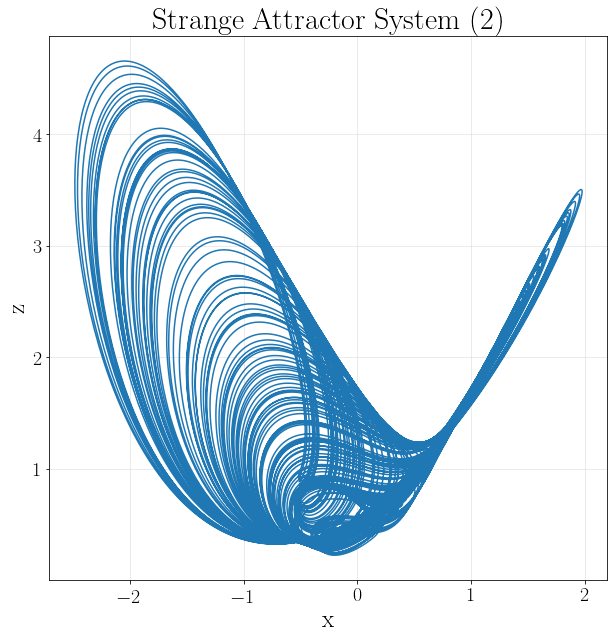

In [16]:
plt.figure(figsize = (10,10))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'Strange Attractor System (2)', fontsize = 30)

plt.plot([i[0] for i in T], [i[2] for i in T])

plt.xlabel(r'x', fontsize=25)
plt.ylabel(r'z', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='both', alpha=.3)
plt.savefig("stragne_attractor_2xz")

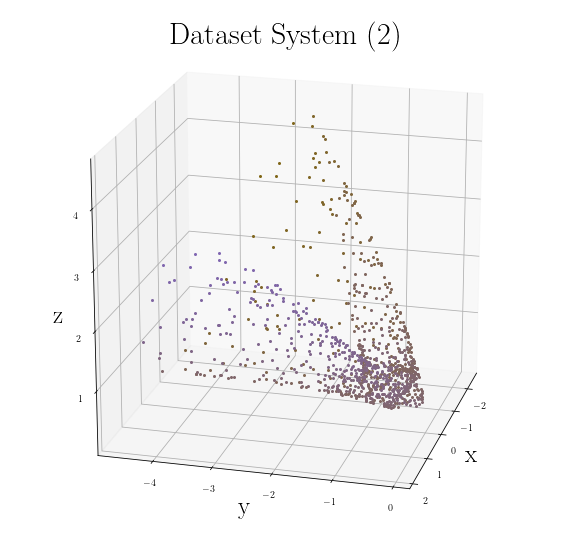

In [15]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ="3d")
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.title(r'Dataset System (2)', fontsize = 30)

ax.view_init(20, 15)
for x,y,z in T[:1000]:
    ax.scatter3D(x, y, z, c=[(0.5, 0.4, (x + 3)/7)], s=4)

ax.set_xlabel('x', fontsize = 25)
ax.set_ylabel('y', fontsize = 25)
ax.set_zlabel('z', fontsize = 25)
plt.savefig("Dataset_2")
plt.show()

In [17]:
os.remove("x_train_1.txt")

f = open("x_train_1.txt", "a")
for i in T:
    f.write(str(i[0]))
    f.write("\n")
f.close()

In [18]:
os.remove("y_train_1.txt")

f = open("y_train_1.txt", "a")
for i in T:
    f.write(str(i[1]))
    f.write("\n")
f.close()

In [19]:
os.remove("z_train_1.txt")

f = open("z_train_1.txt", "a")
for i in T:
    f.write(str(i[2]))
    f.write("\n")
f.close()